# Jupyter operator

In [1]:
import hana_ml
print(hana_ml.__version__)

2.6.21012600


In [2]:
import hana_ml.dataframe as dataframe
from notebook_hana_connector.notebook_hana_connector import NotebookConnectionContext
conn = NotebookConnectionContext(connectionId = 'zHAN')

In [3]:
df_remote = conn.table("VEHICLECOUNT")
df_segments = df_remote.select("LOCATION").distinct().sort("LOCATION", desc = False).collect()

In [4]:
df_segments

,LOCATION
0,Z001
1,Z006
2,Z012
3,Z087


In [4]:
from hdbcli import dbapi

dbapi_cursor = conn.connection.cursor()
if conn.sql("SELECT TABLE_OID FROM SYS.TABLES WHERE TABLE_NAME = 'VEHICLECOUNT_FORECASTS_SEGMENTED';").count() > 0:
   dbapi_cursor.execute("""TRUNCATE TABLE VEHICLECOUNT_FORECASTS_SEGMENTED;""")

In [5]:
import pandas as pd

columns = ["SEGMENT", "MAPE"]
df_allmapes = pd.DataFrame(columns=columns)

In [6]:
from hana_ml.algorithms.apl.time_series import AutoTimeSeries

for index, row in df_segments.iterrows(): 
   
    # Get raw data of each country
    segment = row['LOCATION']
    df_remote_segment = conn.sql("SELECT DATE, VEHICLECOUNT FROM VEHICLECOUNT WHERE LOCATION = '" + segment + "'")
    
    # Sort data ascending, a requirement of the Automated Predictive Library
    df_remote_segment = df_remote_segment.sort("DATE", desc = False)
    
    # Forecast
    tsapl = AutoTimeSeries(time_column_name = 'DATE', target = 'VEHICLECOUNT', horizon = 7)
    tsapl.fit(data = df_remote_segment)
    df_remote_aplforecast = tsapl.forecast(forecast_length = 7)
    df_remote_aplforecast = df_remote_aplforecast.select('*', ("'" + segment + "'", 'SEGMENT'))
    df_remote_aplforecast = df_remote_aplforecast.cast("SEGMENT", "NVARCHAR(100)") # Needed to ensure future segments with longer names can be stored
    df_remote_aplforecast.save("VEHICLECOUNT_FORECASTS_SEGMENTED", append = True)

    # Track model quality
    ts_mape = tsapl.get_performance_metrics()['MAPE'][0]
    df_allmapes = df_allmapes.append({"SEGMENT": segment, "MAPE": ts_mape}, ignore_index=True)

In [8]:
df_allmapes

,SEGMENT,MAPE
0,Z001,0.092671
1,Z006,0.059372
2,Z012,0.064636
3,Z087,0.059643


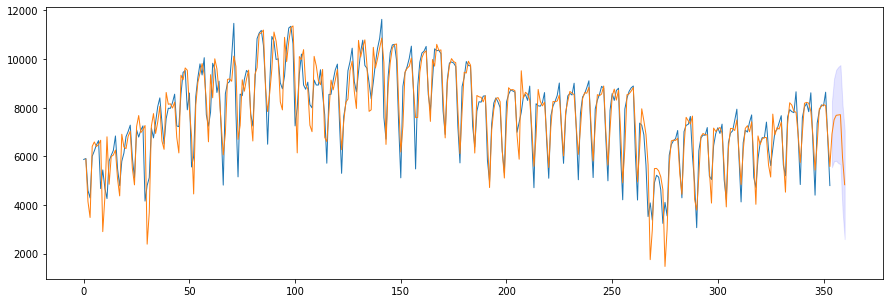

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

df_remote = conn.sql("SELECT * FROM VEHICLECOUNT_FORECASTS_SEGMENTED WHERE SEGMENT ='Z001'")
ts_data = df_remote.collect()
plt.figure(figsize=(15, 5))
plt.plot(ts_data["ACTUAL"], linewidth=1)
plt.plot(ts_data["PREDICTED"], linewidth=1)
plt.fill_between( ts_data.index, ts_data["LOWER_INT_95PCT"], ts_data["UPPER_INT_95PCT"], color='b', alpha=.1);

In [7]:
df_allmapes = df_allmapes.sort_values(by = 'MAPE')
api.send("output2", df_allmapes.to_json(orient = 'records'))

In [8]:
import hana_ml
print(hana_ml.__version__)

import hana_ml.dataframe as dataframe
from notebook_hana_connector.notebook_hana_connector import NotebookConnectionContext
conn = NotebookConnectionContext(connectionId = 'zHAN')

df_remote = conn.table("VEHICLECOUNT")
df_segments = df_remote.select("LOCATION").distinct().sort("LOCATION", desc = False).collect()


from hdbcli import dbapi

dbapi_cursor = conn.connection.cursor()
if conn.sql("SELECT TABLE_OID FROM SYS.TABLES WHERE TABLE_NAME = 'VEHICLECOUNT_FORECASTS_SEGMENTED';").count() > 0:
   dbapi_cursor.execute("""TRUNCATE TABLE VEHICLECOUNT_FORECASTS_SEGMENTED;""")


import pandas as pd

columns = ["SEGMENT", "MAPE"]
df_allmapes = pd.DataFrame(columns=columns)



from hana_ml.algorithms.apl.time_series import AutoTimeSeries

for index, row in df_segments.iterrows(): 

    # Get raw data of each country
    segment = row['LOCATION']
    df_remote_segment = conn.sql("SELECT DATE, VEHICLECOUNT FROM VEHICLECOUNT WHERE LOCATION = '" + segment + "'")

    # Sort data ascending, a requirement of the Automated Predictive Library
    df_remote_segment = df_remote_segment.sort("DATE", desc = False)

    # Forecast
    tsapl = AutoTimeSeries(time_column_name = 'DATE', target = 'VEHICLECOUNT', horizon = 7)
    tsapl.fit(data = df_remote_segment)
    df_remote_aplforecast = tsapl.forecast(forecast_length = 7)
    df_remote_aplforecast = df_remote_aplforecast.select('*', ("'" + segment + "'", 'SEGMENT'))
    df_remote_aplforecast = df_remote_aplforecast.cast("SEGMENT", "NVARCHAR(100)") # Needed to ensure future segments with longer names can be stored
    df_remote_aplforecast.save("VEHICLECOUNT_FORECASTS_SEGMENTED", append = True)

    # Track model quality
    ts_mape = tsapl.get_performance_metrics()['MAPE'][0]
    df_allmapes = df_allmapes.append({"SEGMENT": segment, "MAPE": ts_mape}, ignore_index=True)


df_allmapes = df_allmapes.sort_values(by = 'MAPE')
api.send("output2", df_allmapes.to_json(orient = 'records'))

2.6.21012600


In [1]:
def on_input(data):

    import hana_ml
    print(hana_ml.__version__)

    import hana_ml.dataframe as dataframe
    from notebook_hana_connector.notebook_hana_connector import NotebookConnectionContext
    conn = NotebookConnectionContext(connectionId = 'zHAN')

    df_remote = conn.table("VEHICLECOUNT")
    df_segments = df_remote.select("LOCATION").distinct().sort("LOCATION", desc = False).collect()


    from hdbcli import dbapi

    dbapi_cursor = conn.connection.cursor()
    if conn.sql("SELECT TABLE_OID FROM SYS.TABLES WHERE TABLE_NAME = 'VEHICLECOUNT_FORECASTS_SEGMENTED';").count() > 0:
       dbapi_cursor.execute("""TRUNCATE TABLE VEHICLECOUNT_FORECASTS_SEGMENTED;""")


    import pandas as pd

    columns = ["SEGMENT", "MAPE"]
    df_allmapes = pd.DataFrame(columns=columns)



    from hana_ml.algorithms.apl.time_series import AutoTimeSeries

    for index, row in df_segments.iterrows(): 

        # Get raw data of each country
        segment = row['LOCATION']
        df_remote_segment = conn.sql("SELECT DATE, VEHICLECOUNT FROM VEHICLECOUNT WHERE LOCATION = '" + segment + "'")

        # Sort data ascending, a requirement of the Automated Predictive Library
        df_remote_segment = df_remote_segment.sort("DATE", desc = False)

        # Forecast
        tsapl = AutoTimeSeries(time_column_name = 'DATE', target = 'VEHICLECOUNT', horizon = 7)
        tsapl.fit(data = df_remote_segment)
        df_remote_aplforecast = tsapl.forecast(forecast_length = 7)
        df_remote_aplforecast = df_remote_aplforecast.select('*', ("'" + segment + "'", 'SEGMENT'))
        df_remote_aplforecast = df_remote_aplforecast.cast("SEGMENT", "NVARCHAR(100)") # Needed to ensure future segments with longer names can be stored
        df_remote_aplforecast.save("VEHICLECOUNT_FORECASTS_SEGMENTED", append = True)

        # Track model quality
        ts_mape = tsapl.get_performance_metrics()['MAPE'][0]
        df_allmapes = df_allmapes.append({"SEGMENT": segment, "MAPE": ts_mape}, ignore_index=True)


    df_allmapes = df_allmapes.sort_values(by = 'MAPE')
    api.send("output2", df_allmapes.to_json(orient = 'records'))

api.set_port_callback("input1", on_input)


In this notebook you can find some basic examples on how to use the operator's predefined functions to interact with incoming data and to output data. 
You can also check the documentation for all examples at the [end of this notebook](#Predefined-Functions-Documentation).

Tip: You can access the documentation of a function at any time inside a Jupyter notebook by pressing `Shift-Tab`on top of the function name (inside a code cell) for a short description or `Shift-Tab-Tab` for a complete description.

# Writing data to an output port

You can send data to an output port by calling the function `api.send`.

By executing the below code the operator will write the `data` to the output port `out`. If the port is connected to a terminal, you could see the data on its interface.

In [ ]:
data='test'
api.send('out', data)

Note that the type of output data should be compatible with the output port type, in this case, the type `string`.

# Dealing with input data

Data processing is done with callbacks due to the Modeler's asynchronous nature. For instance, you can set a callback 
to be called when new data is received in the registered port. See below some examples of how to do that.

To try out the use of callbacks, execute the cell below to define a simple function that prints the received data to the cell output and then writes the data to the output port `out`.

In [ ]:
def on_data_in(value):
    print(value)
    api.send('out', value)

## Trying out a callback
The function `api.try_port_callback` executes a callback once with the data from the specified port. Note that this function is available only in interactive mode.

By executing the cell below one input data will be consumed from the input port `in` and fed to the `on_data_in` function. You should see the data received printed to the cell output and the operator should write the data to the output port `out`. 

In [ ]:
api.try_port_callback('in', on_data_in)

If an exception happens during the execution of `api.try_port_callback`, the exception is thrown in the notebook kernel and the graph state won't be affected. The exception and the stack trace are printed to the last active cell output.

## Reading data indefinitely with api.set_port_callback
Callbacks can be registered by using the function `api.set_port_callback`. As a result, the function is called when new data is received in the specified port(s).

By executing the code below, the `on_data_in` callback will be registered for the `in` input port. Thus, `on_data_in` will be executed for new data available.

In [ ]:
api.set_port_callback('in', on_data_in)

If an exception happens during the execution of the callback registered with the `api.set_port_callback` function, the exception is logged into the Python subengine and the graph fails.

## Unregistering a callback
To unregister a callback so that it is no longer executed, you can use the function `api.remove_port_callback` with the function as a parameter.

In [ ]:
api.remove_port_callback(on_data_in)

## Registering callbacks to multiple ports

A callback can be registered to multiple ports. In this case, the callback is executed when data is available in all specified ports.

In [ ]:
def on_multiple_inputs(input1, input2):
    pass

# assuming that there are two input ports: 'in1', 'in2'
api.set_port_callback(['in1', 'in2'], on_multiple_inputs)

# Running in Productive mode

Jupyter operators can run in 'productive' mode so that no user interaction is required to run the cells. This mode can be selected in the operator settings in the Modeler UI, toggling the configuration parameter 'Productive' from `False` to `True`.

When in productive mode, cells tagged as productive are executed with no user interaction. In the Jupyter notebook UI, you can find a tab on top of each cell. To tag a cell, you can type the desired tag in the tab's textbox, in this case, `productive`, and click on 'Add tag' button.

In [ ]:
def my_productive_code(value):
    api.send('out', value)
    
api.set_port_callback('in', my_productive_code)

Notes:
- If the productive code references some other code in a cell that was not marked as productive with the tag `productive`, a runtime error happens because the operator ignores non-productive code in this mode, making the graph fail. Therefore you should mark all relevant code cells as `productive`.
- When running in productive mode, it is not possible to access the Jupyter notebook UI to interact with the cells.
- It is not possible to change the execution mode at runtime. To alter it, you must stop the graph, set the 'Productive' configuration to the desired value, and then start the graph again.


# Accessing the configuration object

You can get the configuration object set in the operator configuration's UI in the Modeler by calling `api.get_config`. For example, to get the location of the current notebook, you can access the "notebookPath" key from the config object.

In [ ]:
config = api.get_config()
config["notebookFilePath"]

# Installing Python modules
Python modules can be installed by using the api.add_dependency function.

In the example below, we use `api.add_dependency` to install the `h5py` module.

In [ ]:
api.add_dependency('h5py')

# Working with messages

You can access the Message type by calling `Message`. The body and attributes of a message object `msg` can be accessed as `msg.body` and `msg.attributes`, respectively.

#### Message(body, attributes)    
    Args:
        *body (object): body of the message
        attributes(dict(str, object) | None): attributes of the message

In [ ]:
new_message = Message(None, {"debug": True, "config": {}})
print(new_message.body)
print(new_message.attributes)

# Predefined Functions Documentation

- [api.send(port, data)](#api.send(port,-data))
- [api.get_config()](#api.get_config())
- [api.add_dependency(package_name)](#api.add_dependency(package_name)
)
- [api.try_port_callback(ports, callback)](#api.try_port_callback(ports,-callback))
- [api.set_port_callback(ports, callback)](#api.set_port_callback(ports,-callback))
- [api.remove_port_callback(callback)](#api.remove_port_callback(callback))

#### api.send(port, data)

    Writes the data to the specified operator output port. Be careful with the correspondence between the Python data object and the Modeler port type.
    Args:
        port (str): operator's output port name
        data: data object to send

#### api.get_config()

    Returns the Jupyter operator's configuration object
    Args:
        None
    Returns:
        config(dict): configuration object

#### api.add_dependency(package_name)

    This method tries to install a Python package using pip. If the installation fails, an exception is raised.

    Args:
        package_name (str): Name of the package to be installed with pip.

#### api.try_port_callback(ports, callback)

    This method executes the callback once with the data retrieved from the specified input port. The callback is called only when there are messages available in all input ports.
    * Note that, this function is available only in interactive mode.
    
    Args:
        ports (str|list[str]): input ports to be tested with the callback. `ports` can be a list of strings with the name of each port to be associated, or a string if you want to associate the callback with a single port.
        callback (func[...]): a callback function with the same number of arguments as elements in `ports`. The arguments are passed to `callback` in the same order as their corresponding ports in the `ports` argument. 

#### api.set_port_callback(ports, callback)
    This method associates the input ports to the callback. The callback is called only when there are messages available in all input ports. If this method is called multiple times for the same group of ports, then the previous callback is overwritten by the provided one.
    Different ports group cannot overlap. For example, a port can be only associated with one callback at a time.
    
    Args:
        ports (str|list[str]): input ports to be associated with the callback. `ports` can be a list of strings with the name of each port to be associated, or a string if you want to associate the callback with a single port.
        callback (func[...]): a callback function with the same number of arguments as elements in `ports` or a variable-length argument. Also the arguments are passed to `callback` in the same order of their corresponding ports in the `ports` argument.   

#### api.remove_port_callback(callback)
    Unregister the callback function. If the function is not registered, the method exits quietly.

    Args:
        callback (func[...]): callback function to be removed.